Some of the code in this lab was copied from the solution at https://github.com/learn-co-curriculum/dsc-corr-autocorr-in-time-series-lab/tree/solution

# Correlation and Autocorrelation in Time Series - Lab

## Introduction

In this lab, You'll practice your knowledge on correlation, autocorrelation and the ACF and PACF.

## Objectives

You will be able to:
- Understand correlation in Time Series
- Plot and discuss the autocorrelation function (ACF) for a time-series 
- Plot and discuss the partial autocorrelation function (PACF) for a time-series 
- Interpret ACF and PACF and Identify use cases both functions

## The Exchange Rate Data

We'll be looking at the exchange rates dataset again. First, import the necessary libraries for time series and plotting. Then import the data (in `exch_rates.csv`) and make sure it's set in the correct time series format with the `datetime` as the index.

In [113]:
# your code here
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

In [114]:
# your code here
ts = pd.read_csv('exch_rates.csv')
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6905 entries, 0 to 6904
Data columns (total 4 columns):
Frequency            6905 non-null object
Euro                 4838 non-null float64
Australian Dollar    4838 non-null float64
Danish Krone         4838 non-null float64
dtypes: float64(3), object(1)
memory usage: 215.9+ KB


In [115]:
ts.Frequency = pd.to_datetime(ts.Frequency)
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6905 entries, 0 to 6904
Data columns (total 4 columns):
Frequency            6905 non-null datetime64[ns]
Euro                 4838 non-null float64
Australian Dollar    4838 non-null float64
Danish Krone         4838 non-null float64
dtypes: datetime64[ns](1), float64(3)
memory usage: 215.9 KB


In [116]:
ts.set_index('Frequency', inplace=True)
ts.head(2)

,Euro,Australian Dollar,Danish Krone
Frequency,,,
2000-01-01,NaN,NaN,NaN
2000-01-02,NaN,NaN,NaN


Plot the three exchange rates in one plot

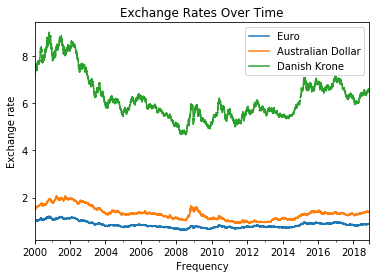

In [117]:
# your code here
ts.plot()
plt.ylabel('Exchange rate')
plt.title('Exchange Rates Over Time')
plt.show()

You can see that the EUR/USD and AUD/USD exchange rate are somewhere between rougly 0.5 and 2 between 2000 and 2018, where the Danish Krone is somewhere between roughly 4.5 and 9. Now let's look at the correlations between these time series.

In [118]:
# your code here
ts.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.883181,0.999952
Australian Dollar,0.883181,1.000000,0.882513
Danish Krone,0.999952,0.882513,1.000000


### What is your conclusion here? You might want to use outside resources to understand what's going on.

In [119]:
# The exchange rates fluctuate but they are correlated so they fluctuate together somewhat

Next, look at the plots of the differenced series. Use subplots to plot them rather than creating just one plot.

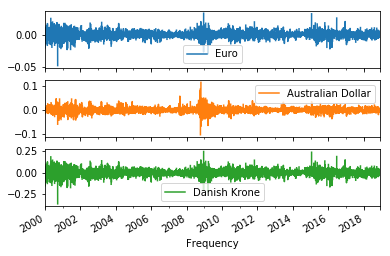

In [120]:
# your code here
ts_diff = ts.diff(periods=1)
ts_diff.plot(subplots=True);

In [121]:
ts_diff.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.545369,0.999667
Australian Dollar,0.545369,1.000000,0.545133
Danish Krone,0.999667,0.545133,1.000000


### Explain what's going on

In [122]:
# The seasonalit was removed so there is less correlation

Next, let's look at the "lag 1 autocorrelation" for the EUR/USD exchange rate. Create a "lag 1 autocorrelation" series, plot the result, and look at the correlation coefficient.

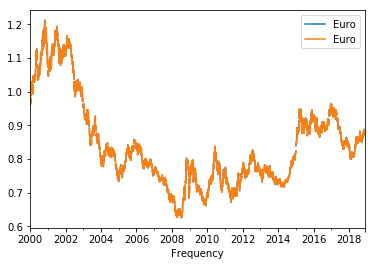

In [123]:
# code in this cell copied from the solution at https://github.com/learn-co-curriculum/dsc-corr-autocorr-in-time-series-lab/tree/solution
euro_shift_1 = ts['Euro'].shift(periods=1)
euro_lag_1 = pd.concat([ts['Euro'], euro_shift_1], axis=1)
euro_lag_1.plot()

In [124]:
# your code here
euro_lag_1.corr()

,Euro,Euro
Euro,1.000000,0.999146
Euro,0.999146,1.000000


Repeat this, but for a "lag 50 autocorrelation"

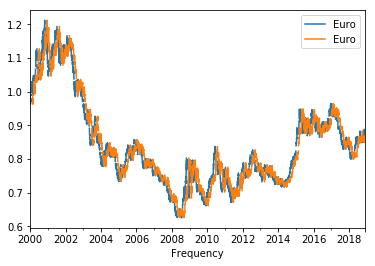

In [125]:
# your code here
euro_shift_50 = ts['Euro'].shift(periods=50)
euro_lag_50 = pd.concat([ts['Euro'], euro_shift_50], axis=1)
euro_lag_50.plot();

In [126]:
# your code here
euro_lag_50.corr()

,Euro,Euro
Euro,1.000000,0.968321
Euro,0.968321,1.000000


### What's your conclusion here?

In [127]:
# The correlation is high even with a lag of 50

Knowing this, let's plot the ACF now.

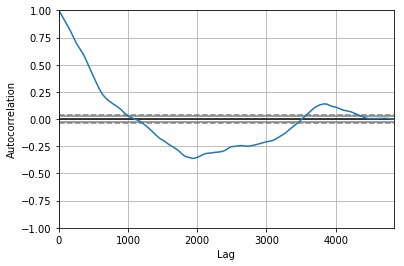

In [128]:
# code in this cell copied from the solution at https://github.com/learn-co-curriculum/dsc-corr-autocorr-in-time-series-lab/tree/solution


pd.plotting.autocorrelation_plot(ts.Euro.dropna());

The series is heavily autocorrelated at first, and then there is a decay. This is a typical result for a series that is a random walk, generally you'll see heavy autocorrelations first, slowly tailing off until there is no autocorrelation anymore.

Next, let's look at the Partial Autocorrelation Function.

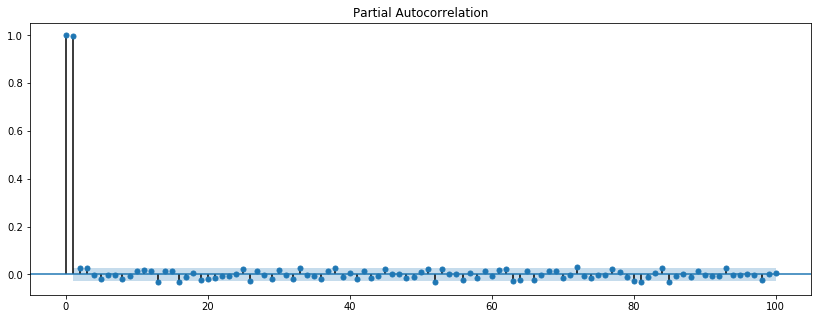

In [129]:
# code in this cell copied from the solution at https://github.com/learn-co-curriculum/dsc-corr-autocorr-in-time-series-lab/tree/solution

rcParams['figure.figsize'] = 14, 5
plot_pacf(ts.Euro.dropna(), lags=100, method='ywm');

This is interesting! Remember that *Partial Autocorrelation Function* gives the partial correlation of a time series with its own lagged values, controlling for the values of the time series at all shorter lags. When controlling for 1 period lags, the PACF is only very high for one-period lags, and basically 0 for shorter lags. This is again a typical result for Random Walk series!

## The Airpassenger Data

Look at ACF and PACF for the airpassenger data and describe the result `passengers.csv`. Do this both for the differenced and regular series.

In [130]:
# your code here
passengers = pd.read_csv('passengers.csv')
passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month          144 non-null object
#Passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [131]:
# your code here
passengers.Month = pd.to_datetime(passengers.Month)
passengers.set_index('Month', inplace=True)

In [132]:
passengers.head(2)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118


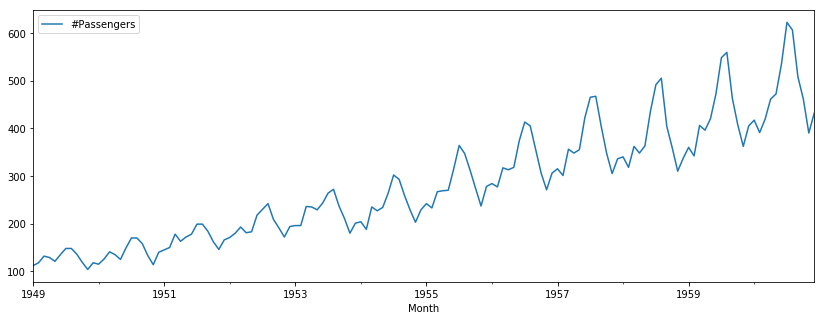

In [133]:
# code in this cell copied from the solution at https://github.com/learn-co-curriculum/dsc-corr-autocorr-in-time-series-lab/tree/solution
# regular plot
passengers.plot();

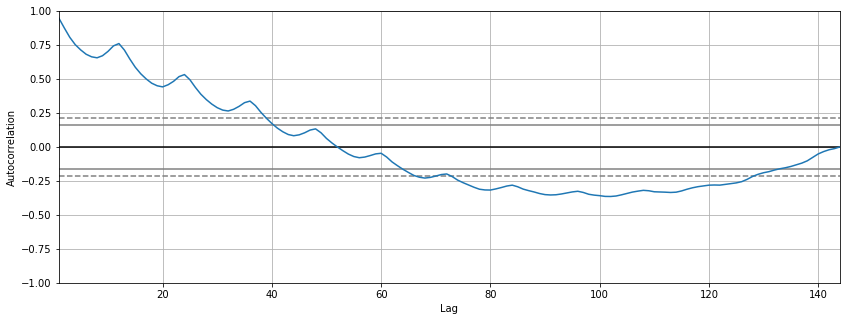

In [134]:
## code in this cell copied from the solution at https://github.com/learn-co-curriculum/dsc-corr-autocorr-in-time-series-lab/tree/solution
# ACF plot
pd.plotting.autocorrelation_plot(passengers);

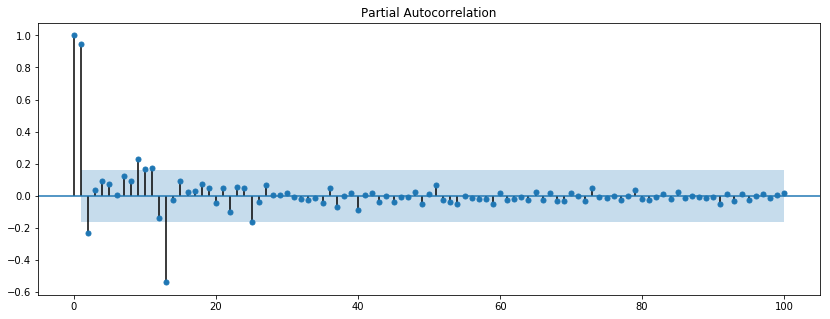

In [135]:
# code in this cell copied from the solution at https://github.com/learn-co-curriculum/dsc-corr-autocorr-in-time-series-lab/tree/solution
# PACF plot
plot_pacf(passengers, lags=100, method='ywm');

In [136]:
# code in this cell copied from the solution at https://github.com/learn-co-curriculum/dsc-corr-autocorr-in-time-series-lab/tree/solution

# now for the differenced data
pass_diff = passengers.diff(periods=1)

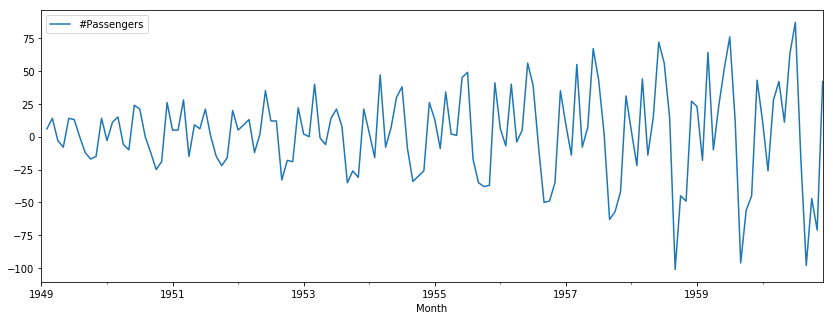

In [137]:
# code in this cell copied from the solution at https://github.com/learn-co-curriculum/dsc-corr-autocorr-in-time-series-lab/tree/solution

# plot
pass_diff.plot();

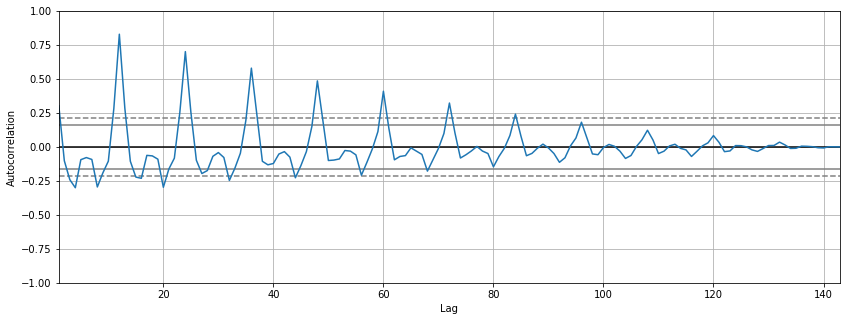

In [138]:
# code in this cell copied from the solution at https://github.com/learn-co-curriculum/dsc-corr-autocorr-in-time-series-lab/tree/solution
#ACF plot
pd.plotting.autocorrelation_plot(pass_diff.dropna());

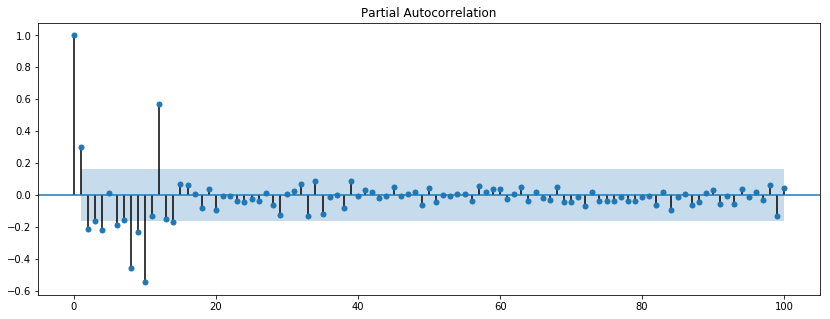

In [139]:
# code in this cell copied from the solution at https://github.com/learn-co-curriculum/dsc-corr-autocorr-in-time-series-lab/tree/solution

plot_pacf(pass_diff.dropna(), lags=100, method='ywm');

### Your conclusion here

In [140]:
# There seems to be correlation at the 12 month mark

## The NYSE data

Look at correlation and autocorrelation functions for the NYSE data ("NYSE_monthly.csv")

In [141]:
# your code here
nyse = pd.read_csv('NYSE_monthly.csv')
nyse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
Month             72 non-null object
monthly_return    72 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB


In [142]:
# your code here
nyse.Month = pd.to_datetime(nyse.Month)
nyse.set_index('Month', inplace=True)

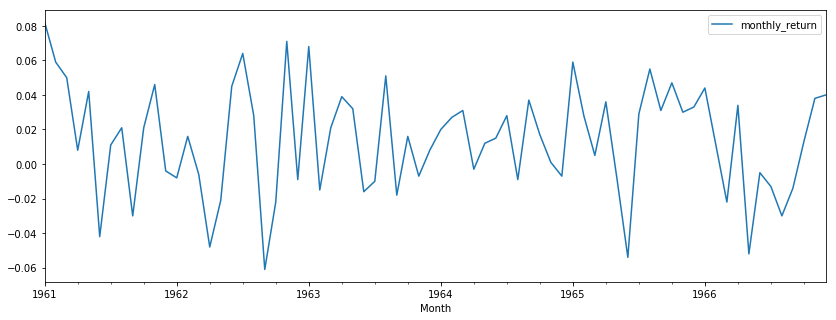

In [143]:
# plot
nyse.plot();

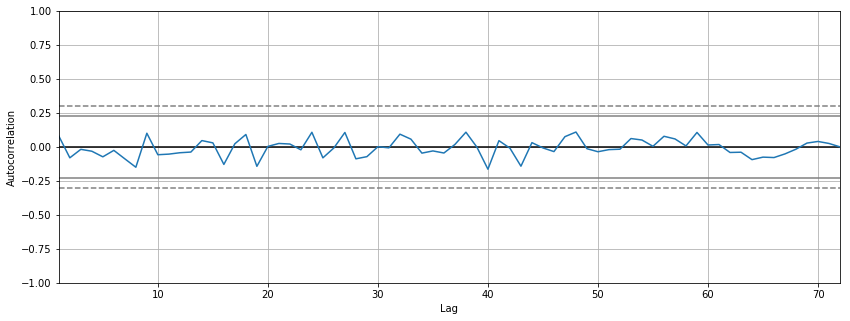

In [144]:
# ACF
pd.plotting.autocorrelation_plot(nyse);

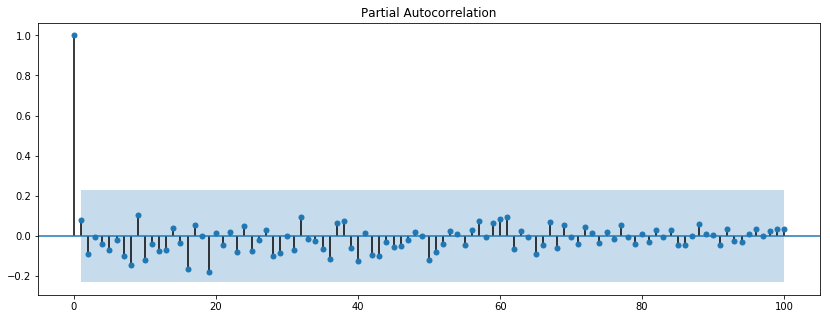

In [145]:
#PACF
plot_pacf(nyse, lags=100, method='ywm');

## Your conclusion here

In [146]:
# There is no correlation



## Summary

Great, you've now been introduced to correlation, the ACF and PACF. Let's move into more serious modeling with autoregressive and moving average models!